In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
from scipy.optimize import minimize

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from IPython.display import clear_output
import os

In [11]:
if not os.path.isdir('./figure/'):
    
    os.makedirs('./figure/')

## Data for Regression

Text(0, 0.5, 'y')

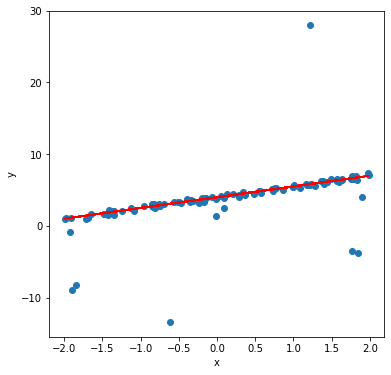

In [12]:
# length of data
lenT = 100

# slope and intercept
intercept = 4
slope = 1.5
#
x_min = -2
x_max = 2
range_x = x_max-x_min
# noise level
sig = 0.2
x1 = x_min + range_x *np.random.rand(lenT)
y = intercept + slope*x1 + sig*np.random.randn(lenT)
#
# add few outlier and assess their impact
m = 10
for i in range(m):
    y[i] = y[i]+10*np.random.randn(1)

plt.figure(figsize=(6,6))
plt.scatter(x1,y)
plt.plot(x1, intercept + slope*x1, color='r')
plt.xlabel('x')
plt.ylabel('y')

In [13]:
### Python Linear Regression Solver

X = np.vstack([x1, np.ones(len(x1))]).T

# Create linear regression object
model = LinearRegression()

# Train the model
model.fit(X, y)

# Predict the y values
y_pred = model.predict(X)

# Get slope (coefficient)&intercept
slope2 = model.coef_[0]
intercept2 = model.intercept_
print("Slope:{:.3f}".format(slope2))
print("Intercept:{:.3f}".format(intercept2))

# Calculate R-square
r_squared = r2_score(y, y_pred)
print("R-square:", r_squared)

Slope:1.791
Intercept:3.503
R-square: 0.2788347064883543


Text(0, 0.5, 'y')

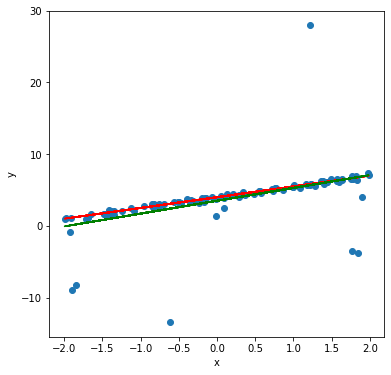

In [14]:
plt.figure(figsize=(6,6))
plt.scatter(x1,y)
plt.plot(x1, intercept  + slope*x1, color='r')
plt.plot(x1, intercept2 + slope2*x1, color='g')
plt.xlabel('x')
plt.ylabel('y')

## Gradient Descent (batch or vanilla)

### Dataset

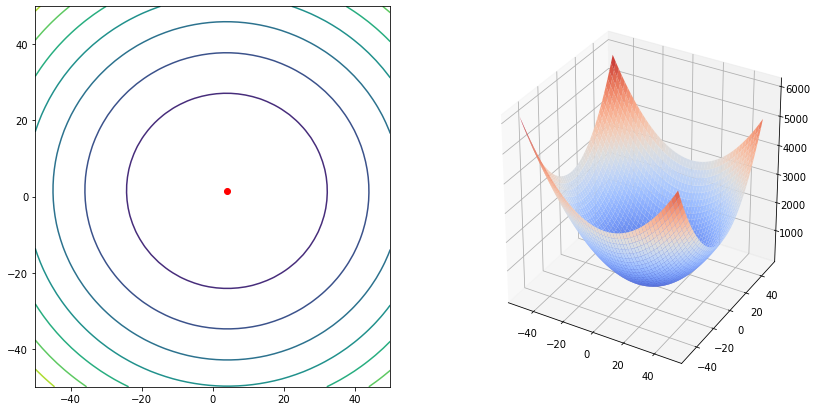

In [15]:
a = np.linspace(-50, 50, 50)
b = np.linspace(-50, 50, 50)
len1 = len(a)
len2 = len(b)

A, B = np.meshgrid(a,b)

s = np.zeros((len2, len1))
for i in np.arange(len1):
    for j in np.arange(len2):
        s[j,i] = np.sum((y-a[i]-b[j]*x1)**2)/lenT

fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(121)
ax1.contour(A,B,s)
ax1.scatter(intercept, slope, color='r')
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(A, B, s, cmap=plt.cm.coolwarm)

In [5]:
# Gradient
def gradF2(params, y, x1):    
    n = len(y)
    intercept_ = params[0]
    slope_ = params[1]
    grad = np.array([-2*np.sum((y - intercept_ - slope_*x1))/n,
                     -2*np.sum((y - intercept_ - slope_*x1)*x1)/n])
    return grad

## (Batch) Gradient Descent

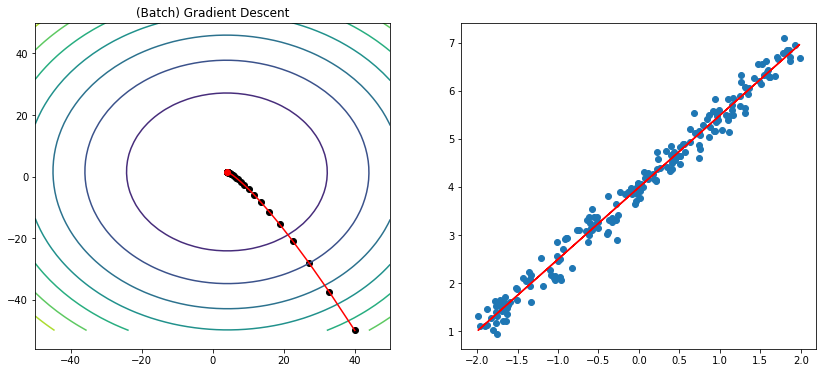

In [16]:
nIters = 50
g1 = 0.1 # learning rate

intercept_ = 40
slope_ = -50
x_i = np.array([intercept_, slope_])

beta0 = np.zeros(nIters+1)
beta1 = np.zeros(nIters+1)
beta0[0] = intercept_
beta1[0] = slope_

for i in np.arange(nIters):
    
    delF = gradF2(x_i, y, x1);
    x_i = x_i - g1*delF
    beta0[i+1] = x_i[0]
    beta1[i+1] = x_i[1]
    
    clear_output(wait=True)
    
    fig = plt.figure(figsize=(14,6))
    ax1 = fig.add_subplot(121)
    ax1.contour(A,B,s)
    ax1.plot(beta0[:i],beta1[:i],color='r')
    ax1.scatter(beta0[:i],beta1[:i],color='k')
    ax1.scatter(intercept, slope, color='r')
    ax1.set_title('(Batch) Gradient Descent')
    ax2 = fig.add_subplot(122)
    ax2.scatter(x1,y)
    ax2.plot(x1, beta0[i+1]+beta1[i+1]*x1, color='r')
    #fig.savefig('figure/Batch_'+str(i)+'.png')
    plt.pause(0.1) # number of seconds before updating the graph
    plt.show()

## Mini-Batch Gradient Descent

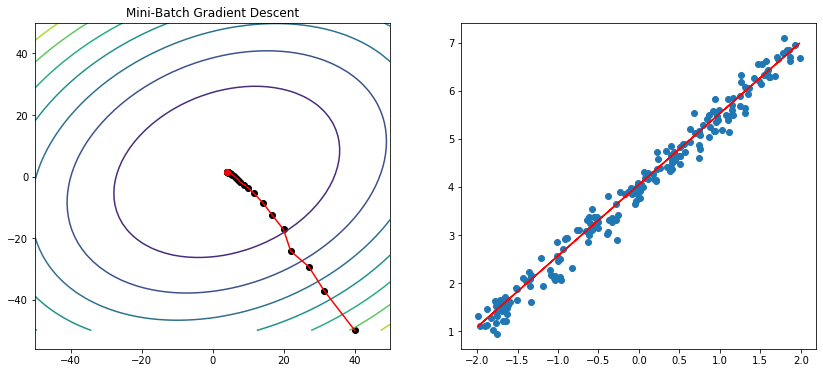

In [17]:
nIters = 5
g1 = 0.1 # learning rate
intercept_ = 40
slope_ = -50
x_i = np.array([intercept_, slope_])

batchSize = 30
#numOfBatches = 20
numOfBatches = np.ceil(lenT/batchSize)

beta0 = np.zeros(int(nIters*numOfBatches+1))
beta1 = np.zeros(int(nIters*numOfBatches+1))
beta0[0] = intercept_
beta1[0] = slope_

for i in np.arange(nIters-1):
    for j in np.arange(numOfBatches): 
        
        clear_output(wait=True)
        
        start = int(j*batchSize)
        finish =int(min((j+1)*batchSize, lenT-1))
        
        xHat = x1[start:finish]
        yHat = y[start:finish]
        delF = gradF2(x_i, yHat, xHat);
        
        for i1 in np.arange(len1): 
            for j1 in np.arange(len2):
                s[j1,i1] = np.sum((yHat-a[i1]-b[j1]*xHat)**2)/batchSize
        
        x_i = x_i - g1*delF
        idx = int(i*numOfBatches+j+1)
        beta0[idx] = x_i[0]
        beta1[idx] = x_i[1]
        
        fig = plt.figure(figsize=(14,6))
        ax1 = fig.add_subplot(121)
        ax1.contour(A,B,s)
        ax1.plot(beta0[:idx+1],beta1[:idx+1],color='r')
        ax1.scatter(beta0[:idx+1],beta1[:idx+1],color='k')
        ax1.scatter(intercept, slope, color='r')
        ax1.set_title('Mini-Batch Gradient Descent')
        ax2 = fig.add_subplot(122)
        ax2.scatter(x1,y)
        ax2.plot(x1,beta0[idx]+beta1[idx]*x1,color='r')
        #fig.savefig('figure/miniBatch_'+str(i)+'_'+str(j)+'.png')
        plt.pause(0.1) # number of seconds before updating the graph
        plt.show()

## Stochastic Gradient Descent

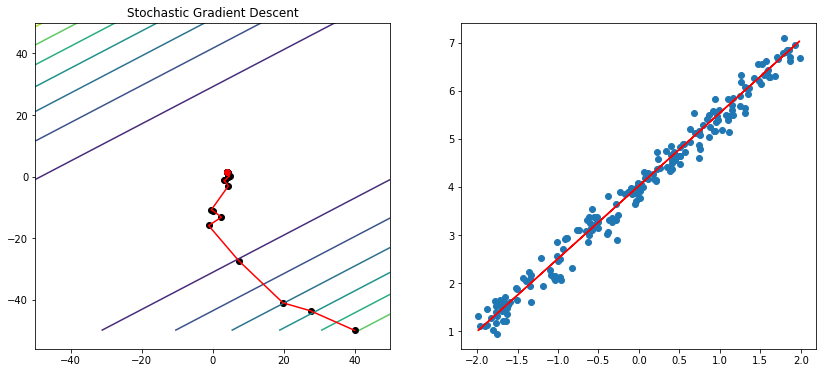

In [18]:
nIters = 1
g1 = 0.1 # learning rate
intercept_ = 40
slope_ = -50
x_i = np.array([intercept_,slope_])

batchSize = 1
#numOfBatches = np.ceil(lenT/batchSize)
numOfBatches = 25

beta0 = np.zeros(int(nIters*numOfBatches+1))
beta1 = np.zeros(int(nIters*numOfBatches+1))
beta0[0] = intercept_
beta1[0] = slope_

for i in np.arange(nIters):
    for j in np.arange(numOfBatches): 
        
        clear_output(wait=True)
        
        start = int(j*batchSize)
        finish =int(min((j+1)*batchSize, lenT-1))
        
        xHat = x1[start:finish]
        yHat = y[start:finish]
        delF = gradF2(x_i, yHat, xHat);
        
        for i1 in np.arange(len1): 
            for j1 in np.arange(len2):
                s[j1,i1] = np.sum((yHat-a[i1]-b[j1]*xHat)**2)/batchSize
        
        x_i = x_i - g1*delF
        idx = int(i*numOfBatches+j+1)
        beta0[idx] = x_i[0]
        beta1[idx] = x_i[1]
        
        fig = plt.figure(figsize=(14,6))
        ax1 = fig.add_subplot(121)
        ax1.contour(A,B,s)
        ax1.plot(beta0[:idx+1],beta1[:idx+1],color='r')
        ax1.scatter(beta0[:idx+1],beta1[:idx+1],color='k')
        ax1.scatter(intercept, slope, color='r')
        ax1.set_title('Stochastic Gradient Descent')
        ax2 = fig.add_subplot(122)
        ax2.scatter(x1,y)
        ax2.plot(x1,beta0[idx]+beta1[idx]*x1,color='r')
        #fig.savefig('figure/miniBatch_'+str(i)+'_'+str(j)+'.png')
        plt.pause(0.1) # number of seconds before updating the graph
        plt.show()


